<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/Basketball_knn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source referernce : https://github.com/wikibook/machine-learning

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
np.random.seed(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

가장 적합한 K를 찾기 위해 cross validation 교차 검증 실행한다

In [9]:
train.shape

(80, 5)

In [10]:
max_k_range = train.shape[0] // 2
max_k_range

40

In [11]:
k_list = []
for i in range(3, max_k_range, 2):
  k_list.append(i) # knn에서 k값은 홀수로 지정해준다.

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']] # 정답=레이블 값

In [12]:
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [20]:
print(x_train.head(3), end='\n')
print(y_train.head(3))

    3P  BLK  TRB
0  1.3  0.1  2.6
1  2.4  0.3  2.8
2  2.1  0.1  1.5
  Pos
0  SG
1  SG
2  SG


In [21]:
# 10-fold cross validation
for k in k_list: # k= 3,5,7, .... 쭉 다 테스트 해봄.
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                           cv=10, scoring='accuracy') # cv = 10 검증값을 10으로
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

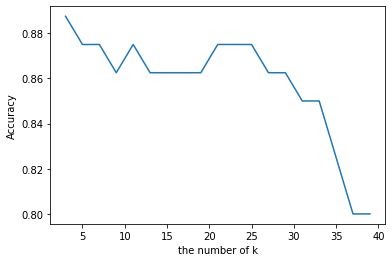

In [22]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()
# k가 3일 때 가장 정답을 잘 맞춘 것으로 확인 됨
# 즉 3P, BLK, TRB 컬럼으로 어떤 포지션인지 제일 잘 맞춤

In [29]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : ", str(k))

The best number of k :  3


**2개의 컬럼=특징 으로 예측하기(3점, 블로킹**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

In [32]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel()) # x_train 데이터와 y_train 라벨(정답) 넣어서 훈련시킴

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [35]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [36]:
# 예측한 값과, 실제 정답 값이 전부 일치한 것을 볼 수 있다.
print("accuracy :" + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy :1.0


**3개의 컬럼(특징)으로 예측하기 - 3점슛, 블로킹, 리바운드**

In [37]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [38]:
comparison = pd.DataFrame({
    'prediction':pred, 'ground_truth':y_test.values.ravel()})

comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [40]:
# 특징을 3개 줬을때는, 앞선 특징 2개 조건보다 정답률이 떨어지는 걸 확인할 수 있다.
# 즉, 센터 포지션과 슈팅가드 포지션에 영향을 끼치는 가장 중요한 2가지 특징은 3P, BLK이며 리바운드는 덜 영향을 끼치는 것으로 판단할 수 있다
print("accuracy : " + 
          str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95
